In [1]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

from local_explanations import *
import utils
import models
import json

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import torch
import torch_geometric.transforms as T
from torch_geometric.utils import from_networkx, to_networkx

%load_ext autoreload
%autoreload 2

### Read hyper-parameters and data

In [2]:
DATASET_NAME = "BAMultiShapes"

with open("../config/" + DATASET_NAME + "_params.json") as json_file:
    hyper_params = json.load(json_file)

In [3]:
adjs_train , \
edge_weights_train , \
ori_classes_train , \
belonging_train , \
summary_predictions_train , \
le_classes_train = read_bamultishapes(evaluate_method=False, 
                                      remove_mix=False, 
                                      min_num_include=5, 
                                      split="TRAIN")

In [4]:
adjs_val , \
edge_weights_val , \
ori_classes_val , \
belonging_val , \
summary_predictions_val , \
le_classes_val = read_bamultishapes(evaluate_method=False, 
                                     remove_mix=False, 
                                     min_num_include=5, 
                                     split="VAL")

In [5]:
adjs_test , \
edge_weights_test , \
ori_classes_test , \
belonging_test , \
summary_predictions_test , \
le_classes_test = read_bamultishapes(evaluate_method=False, 
                                      remove_mix=False, 
                                      min_num_include=5, 
                                      split="TEST")

### dataset

In [6]:
device = "cpu" #torch.device('cuda' if torch.cuda.is_available() else 'cpu')
transform = T.Compose([
    T.NormalizeFeatures(),
])     


dataset_train = utils.LocalExplanationsDataset("", adjs_train, "same", transform=transform, y=le_classes_train, belonging=belonging_train, task_y=ori_classes_train)
dataset_val   = utils.LocalExplanationsDataset("", adjs_val, "same", transform=transform, y=le_classes_val, belonging=belonging_val, task_y=ori_classes_val)
dataset_test  = utils.LocalExplanationsDataset("", adjs_test, "same", transform=transform, y=le_classes_test, belonging=belonging_test, task_y=ori_classes_test)

/DATATWO/users/burouj/code/github/glgexplainer/code/utils.py:54: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  edge_attr=torch.tensor(t.weight).reshape(-1, 1),


### Train GLGExplainer

/DATATWO/users/burouj/miniconda3/envs/glg/lib/python3.10/site-packages/torch_geometric/data/in_memory_dataset.py:301: UserWarning: It is not recommended to directly access the internal storage format `data` of an 'InMemoryDataset'. If you are absolutely certain what you are doing, access the internal storage via `InMemoryDataset._data` instead to suppress this warning. Alternatively, you can access stacked individual attributes of every graph via `dataset.{attr_name}`.
  warnings.warn(msg)


(array([0., 1., 2., 3., 4., 5., 6., 7.], dtype=float32), array([167, 161, 263, 210,  11,  21,  26,   3]))
[0.96758425 0.02933611]


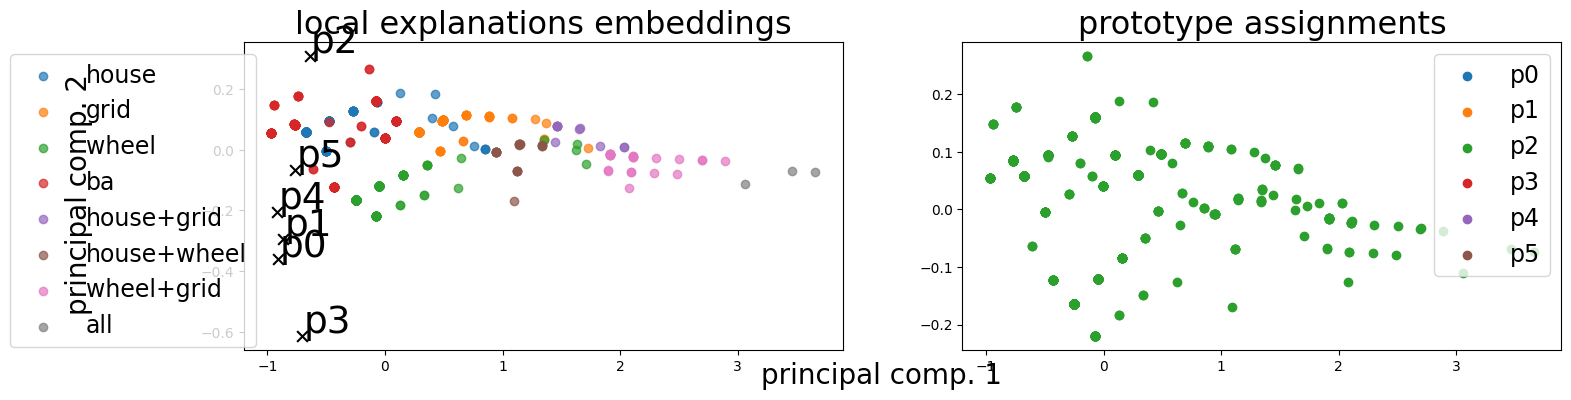

Alpha norms:
tensor([[0.9595, 1.0000, 0.9094, 0.7717, 0.9062, 0.8726],
        [0.8822, 0.8649, 0.8276, 1.0000, 0.9040, 0.7665]])
Concept Purity: 0.305104 +- 0.000000
Concept distribution:  (array([2]), array([862]))
Logic formulas:
For class 0:
0.0 ()
For class 1:
0.0 ()
Accuracy as classifier:  0.0
LEN fidelity:  tensor(0.)

  1 | Train Acc: 0.00, Train Loss: 0.14925, Train LEN loss: 0.072214, | Val Acc: 0.00, Val Loss: 0.22558, Val LEN loss: 0.101
  2 | Train Acc: 0.00, Train Loss: 0.13228, Train LEN loss: 0.071964, | Val Acc: 0.00, Val Loss: 0.19356, Val LEN loss: 0.101
  3 | Train Acc: 0.00, Train Loss: 0.11865, Train LEN loss: 0.071732, | Val Acc: 0.00, Val Loss: 0.17420, Val LEN loss: 0.100
  4 | Train Acc: 0.00, Train Loss: 0.10958, Train LEN loss: 0.071489, | Val Acc: 0.00, Val Loss: 0.16556, Val LEN loss: 0.100
  5 | Train Acc: 0.00, Train Loss: 0.10343, Train LEN loss: 0.071220, | Val Acc: 0.00, Val Loss: 0.16182, Val LEN loss: 0.100
  6 | Train Acc: 0.00, Train Loss: 0.1009

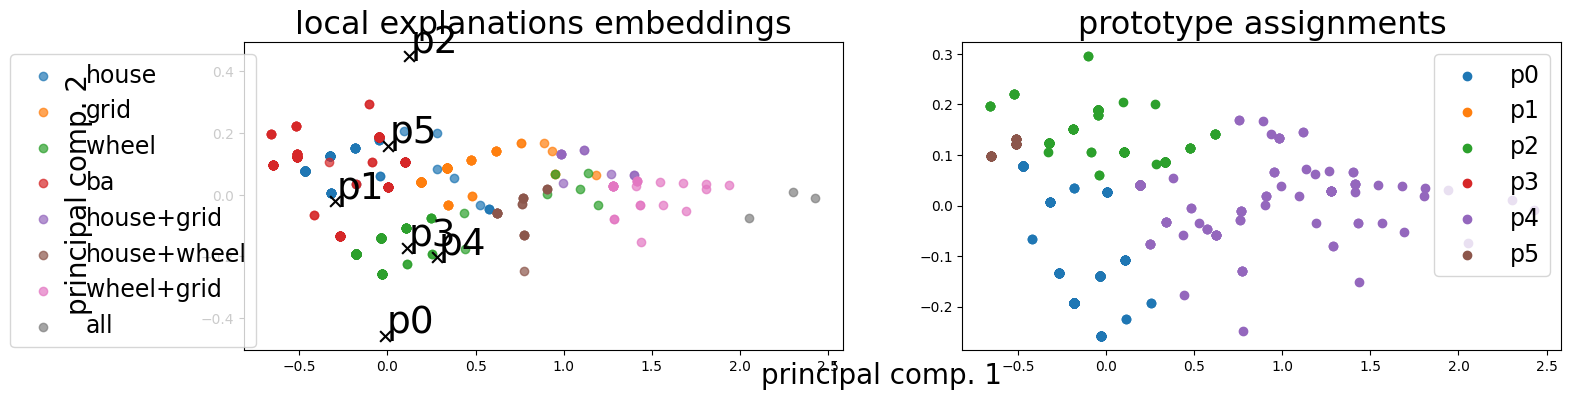

Alpha norms:
tensor([[1.0000, 0.9991, 0.9920, 0.8449, 0.9705, 0.9636],
        [0.8285, 0.7287, 0.7425, 1.0000, 0.8211, 0.7337]])
Concept Purity: 0.662564 +- 0.202104
Concept distribution:  (array([0, 2, 4, 5]), array([406, 230, 175,  51]))
Logic formulas:
For class 0:
0.0 ()
For class 1:
0.0 ()
Accuracy as classifier:  0.0
LEN fidelity:  tensor(0.)


 20 | Train Acc: 0.00, Train Loss: 0.08043, Train LEN loss: 0.067441, | Val Acc: 0.00, Val Loss: 0.14239, Val LEN loss: 0.095
 21 | Train Acc: 0.00, Train Loss: 0.08055, Train LEN loss: 0.067177, | Val Acc: 0.00, Val Loss: 0.13791, Val LEN loss: 0.095
 22 | Train Acc: 0.00, Train Loss: 0.07961, Train LEN loss: 0.067077, | Val Acc: 0.00, Val Loss: 0.14149, Val LEN loss: 0.094
 23 | Train Acc: 0.00, Train Loss: 0.07944, Train LEN loss: 0.066844, | Val Acc: 0.00, Val Loss: 0.13683, Val LEN loss: 0.094
 24 | Train Acc: 0.00, Train Loss: 0.07714, Train LEN loss: 0.066409, | Val Acc: 0.00, Val Loss: 0.13358, Val LEN loss: 0.094
 25 | Train Acc:

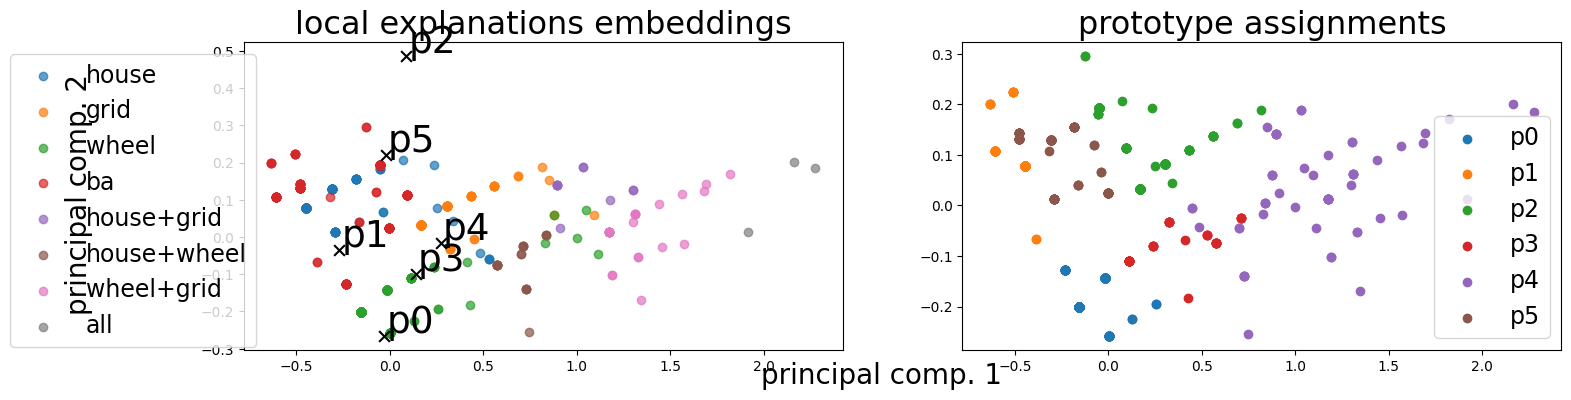

Alpha norms:
tensor([[0.7253, 0.6247, 0.8634, 0.5524, 1.0000, 0.6330],
        [0.9041, 0.5422, 0.8995, 0.8661, 1.0000, 0.6986]])
Concept Purity: 0.614161 +- 0.161582
Concept distribution:  (array([0, 1, 2, 3, 4, 5]), array([265, 123, 254,  38,  62, 120]))
Logic formulas:
For class 0:
0.0 ()
For class 1:
0.39473684210526316 (feature0000000005 & feature0000000002 & feature0000000000)
Accuracy as classifier:  0.0
LEN fidelity:  tensor(0.0094)


 40 | Train Acc: 0.00, Train Loss: 0.06870, Train LEN loss: 0.061406, | Val Acc: 0.00, Val Loss: 0.12325, Val LEN loss: 0.089
 41 | Train Acc: 0.05, Train Loss: 0.06766, Train LEN loss: 0.060701, | Val Acc: 0.00, Val Loss: 0.12560, Val LEN loss: 0.090
 42 | Train Acc: 0.17, Train Loss: 0.06736, Train LEN loss: 0.060011, | Val Acc: 0.00, Val Loss: 0.12325, Val LEN loss: 0.091
 43 | Train Acc: 0.18, Train Loss: 0.06668, Train LEN loss: 0.059762, | Val Acc: 0.00, Val Loss: 0.12283, Val LEN loss: 0.089
 44 | Train Acc: 0.16, Train Loss: 0.06716, Train

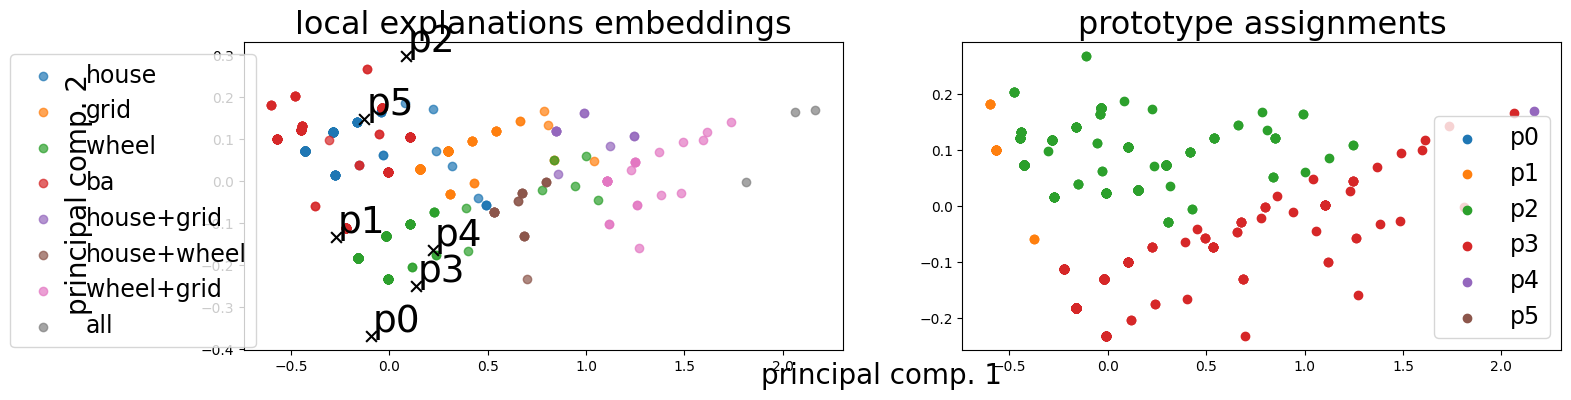

Alpha norms:
tensor([[0.3730, 0.3914, 0.8264, 0.4309, 1.0000, 0.3670],
        [0.4842, 0.2937, 0.8984, 0.6858, 1.0000, 0.4849]])
Concept Purity: 0.773615 +- 0.273062
Concept distribution:  (array([1, 2, 3, 4]), array([ 27, 492, 342,   1]))
Logic formulas:
For class 0:
0.0 ()
For class 1:
0.0 ()
Accuracy as classifier:  0.0
LEN fidelity:  tensor(0.6147)


 60 | Train Acc: 0.61, Train Loss: 0.05965, Train LEN loss: 0.055332, | Val Acc: 0.48, Val Loss: 0.12351, Val LEN loss: 0.096
 61 | Train Acc: 0.64, Train Loss: 0.05996, Train LEN loss: 0.055411, | Val Acc: 0.48, Val Loss: 0.12424, Val LEN loss: 0.096
 62 | Train Acc: 0.64, Train Loss: 0.05928, Train LEN loss: 0.054672, | Val Acc: 0.48, Val Loss: 0.12344, Val LEN loss: 0.097
 63 | Train Acc: 0.63, Train Loss: 0.06201, Train LEN loss: 0.057180, | Val Acc: 0.48, Val Loss: 0.12189, Val LEN loss: 0.096
 64 | Train Acc: 0.61, Train Loss: 0.05917, Train LEN loss: 0.055264, | Val Acc: 0.43, Val Loss: 0.12243, Val LEN loss: 0.095
 65 | Train 

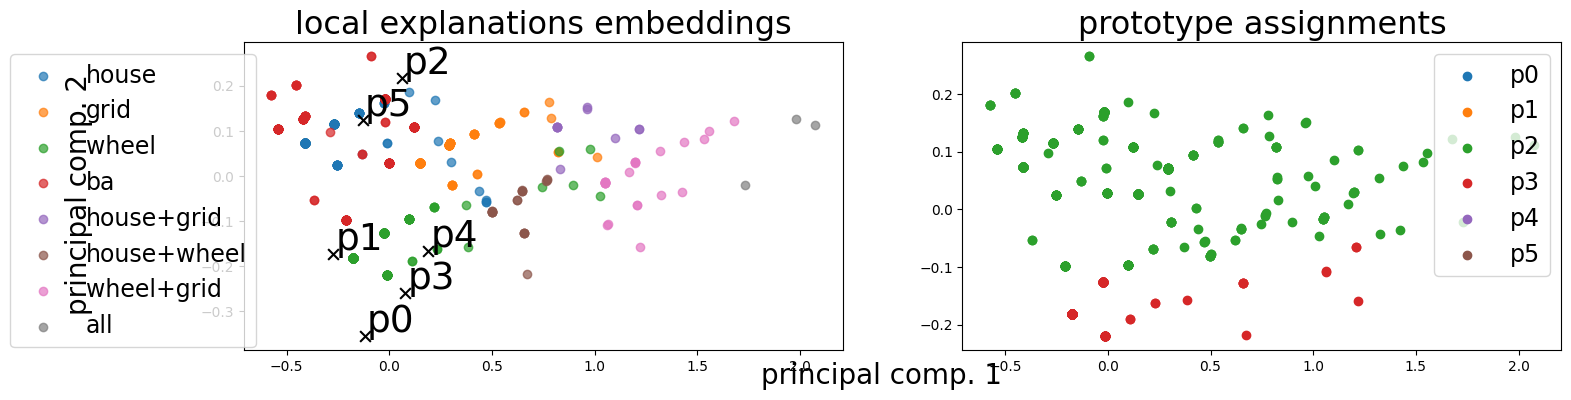

Alpha norms:
tensor([[0.2439, 0.2694, 0.7857, 0.3352, 1.0000, 0.2485],
        [0.2546, 0.1730, 0.8369, 0.5110, 1.0000, 0.2668]])
Concept Purity: 0.651569 +- 0.308431
Concept distribution:  (array([2, 3]), array([612, 250]))
Logic formulas:
For class 0:
0.0 ()
For class 1:
0.0 ()
Accuracy as classifier:  0.0
LEN fidelity:  tensor(0.6147)


 80 | Train Acc: 0.63, Train Loss: 0.05922, Train LEN loss: 0.055439, | Val Acc: 0.49, Val Loss: 0.12758, Val LEN loss: 0.104
 81 | Train Acc: 0.61, Train Loss: 0.05587, Train LEN loss: 0.052169, | Val Acc: 0.49, Val Loss: 0.12635, Val LEN loss: 0.104
 82 | Train Acc: 0.59, Train Loss: 0.05850, Train LEN loss: 0.055016, | Val Acc: 0.48, Val Loss: 0.12610, Val LEN loss: 0.104
 83 | Train Acc: 0.58, Train Loss: 0.05760, Train LEN loss: 0.054292, | Val Acc: 0.46, Val Loss: 0.12628, Val LEN loss: 0.103
 84 | Train Acc: 0.64, Train Loss: 0.05698, Train LEN loss: 0.053780, | Val Acc: 0.48, Val Loss: 0.12818, Val LEN loss: 0.105
 85 | Train Acc: 0.60, Train

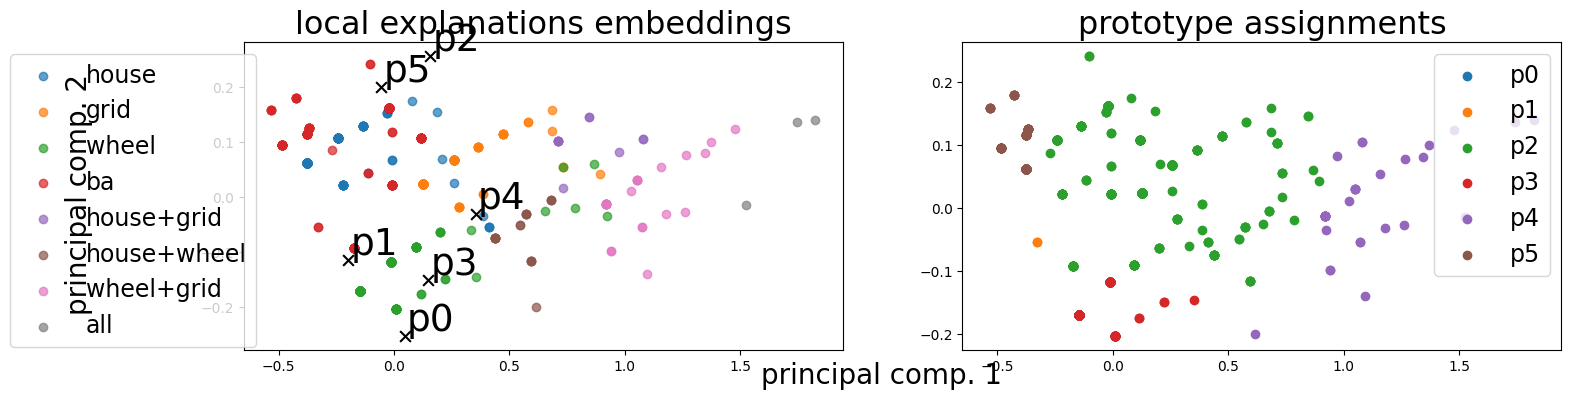

Alpha norms:
tensor([[0.2127, 0.2309, 0.8033, 0.3043, 1.0000, 0.2193],
        [0.1785, 0.1198, 0.8283, 0.3810, 1.0000, 0.1545]])
Concept Purity: 0.747494 +- 0.241334
Concept distribution:  (array([1, 2, 3, 4, 5]), array([  2, 435, 240,  34, 151]))
Logic formulas:
For class 0:
0.0 ()
For class 1:
0.0 ()
Accuracy as classifier:  0.0
LEN fidelity:  tensor(0.6147)


100 | Train Acc: 0.69, Train Loss: 0.05593, Train LEN loss: 0.053168, | Val Acc: 0.49, Val Loss: 0.13129, Val LEN loss: 0.112
101 | Train Acc: 0.69, Train Loss: 0.05425, Train LEN loss: 0.051582, | Val Acc: 0.43, Val Loss: 0.13041, Val LEN loss: 0.109
102 | Train Acc: 0.74, Train Loss: 0.05128, Train LEN loss: 0.048195, | Val Acc: 0.43, Val Loss: 0.13176, Val LEN loss: 0.110
103 | Train Acc: 0.75, Train Loss: 0.05294, Train LEN loss: 0.050162, | Val Acc: 0.46, Val Loss: 0.12653, Val LEN loss: 0.107
104 | Train Acc: 0.69, Train Loss: 0.05450, Train LEN loss: 0.051536, | Val Acc: 0.49, Val Loss: 0.13242, Val LEN loss: 0.113
105 

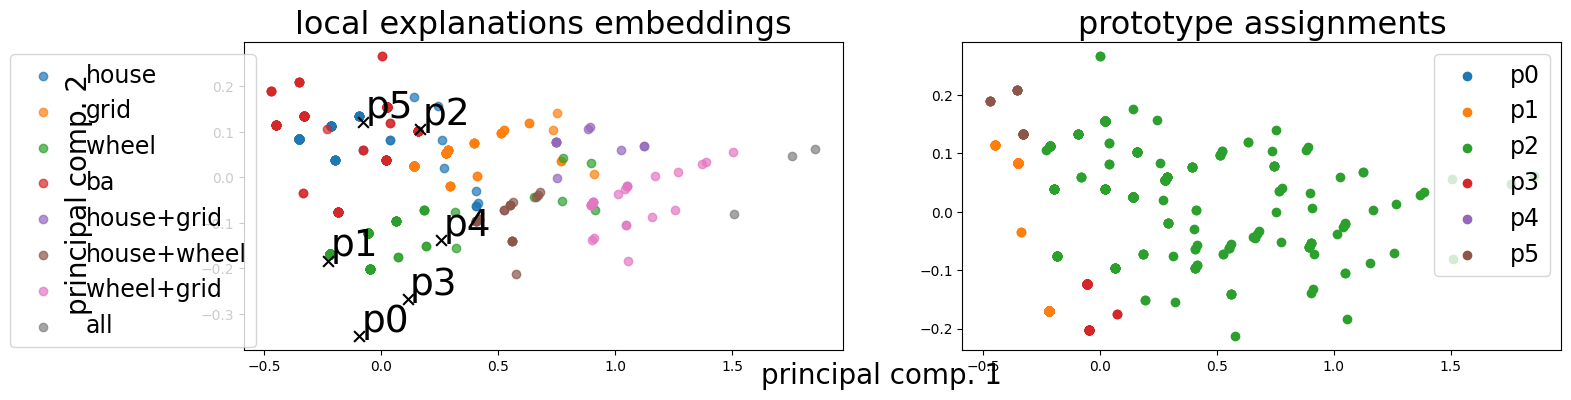

Alpha norms:
tensor([[0.2141, 0.2116, 0.7571, 0.2665, 1.0000, 0.1952],
        [0.1480, 0.0849, 0.7869, 0.2732, 1.0000, 0.1071]])
Concept Purity: 0.721275 +- 0.287808
Concept distribution:  (array([1, 2, 3, 5]), array([250, 472, 101,  39]))
Logic formulas:
For class 0:
0.7518796992481203 (feature0000000001) | ((feature0000000005 & feature0000000001) | ((feature0000000005)
For class 1:
0.8308270676691729 (feature0000000002) | (feature0000000003 & feature0000000002) | (feature0000000005 & feature0000000002) | ((feature0000000001 & feature0000000002) | ((feature0000000001 & feature0000000005 & feature0000000002) | ((feature0000000001 & feature0000000003 & feature0000000002)
Accuracy as classifier:  0.7519
LEN fidelity:  tensor(0.7406)


120 | Train Acc: 0.72, Train Loss: 0.05140, Train LEN loss: 0.049023, | Val Acc: 0.43, Val Loss: 0.13368, Val LEN loss: 0.116
121 | Train Acc: 0.71, Train Loss: 0.05214, Train LEN loss: 0.050003, | Val Acc: 0.47, Val Loss: 0.12566, Val LEN loss: 0.107
122 

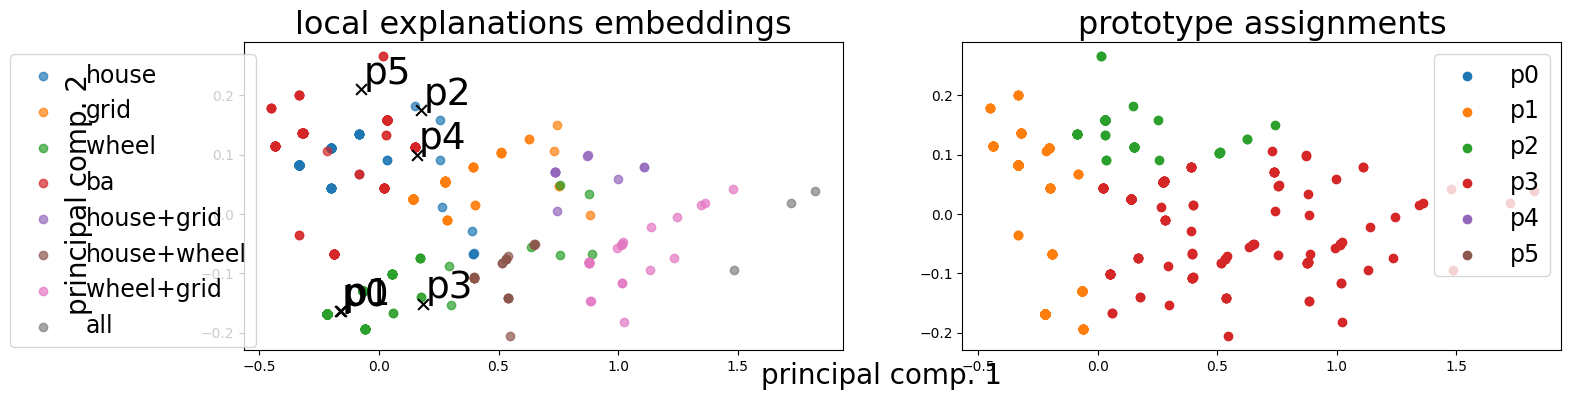

Alpha norms:
tensor([[0.2090, 0.2078, 0.7929, 0.2702, 1.0000, 0.1883],
        [0.1462, 0.0699, 0.8992, 0.2608, 1.0000, 0.1059]])
Concept Purity: 0.616044 +- 0.117706
Concept distribution:  (array([1, 2, 3]), array([469, 126, 267]))
Logic formulas:
For class 0:
0.9116541353383458 (feature0000000001)
For class 1:
0.9116541353383458 (feature0000000003) | (feature0000000002) | (feature0000000003 & feature0000000002) | ((feature0000000001 & feature0000000003) | ((feature0000000001 & feature0000000002) | ((feature0000000001 & feature0000000003 & feature0000000002)
Accuracy as classifier:  0.9117
LEN fidelity:  tensor(0.9117)


140 | Train Acc: 0.79, Train Loss: 0.05024, Train LEN loss: 0.048159, | Val Acc: 0.54, Val Loss: 0.11566, Val LEN loss: 0.096
141 | Train Acc: 0.75, Train Loss: 0.04958, Train LEN loss: 0.047731, | Val Acc: 0.54, Val Loss: 0.11772, Val LEN loss: 0.098
142 | Train Acc: 0.75, Train Loss: 0.04907, Train LEN loss: 0.047324, | Val Acc: 0.53, Val Loss: 0.12307, Val LEN loss

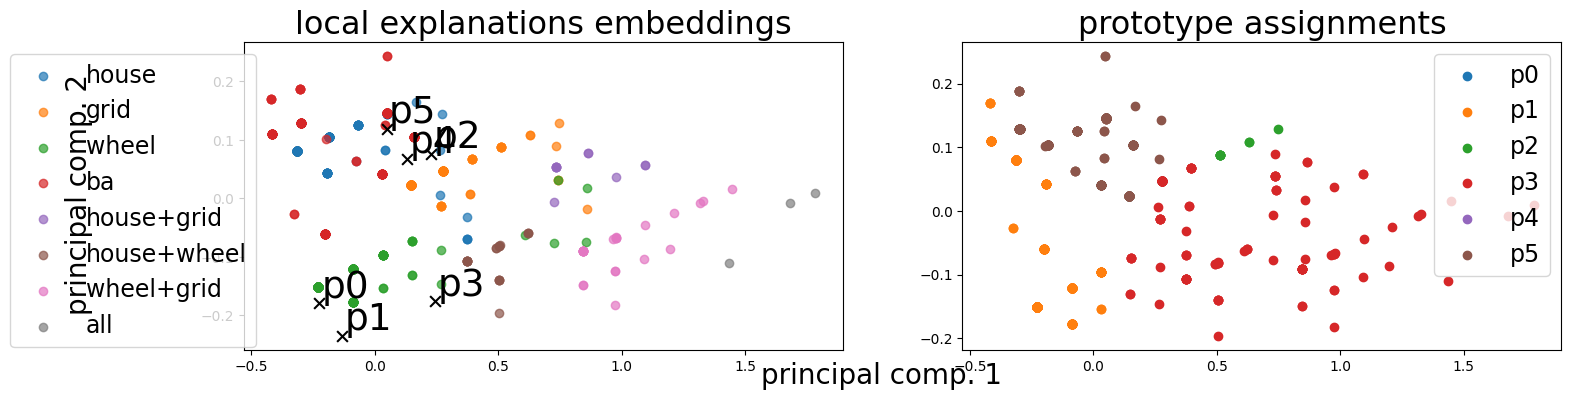

Alpha norms:
tensor([[0.2075, 0.2201, 0.7896, 0.3900, 1.0000, 0.1981],
        [0.1392, 0.0665, 0.9064, 0.3762, 1.0000, 0.1216]])
Concept Purity: 0.650366 +- 0.209274
Concept distribution:  (array([1, 2, 3, 5]), array([405,   9, 147, 301]))
Logic formulas:
For class 0:
0.8515037593984962 (feature0000000001)
For class 1:
0.8515037593984962 (feature0000000005) | (feature0000000003) | (feature0000000005 & feature0000000003) | ((feature0000000001 & feature0000000003) | ((feature0000000001 & feature0000000005) | ((feature0000000001 & feature0000000002) | ((feature0000000001 & feature0000000005 & feature0000000003) | (feature0000000002)
Accuracy as classifier:  0.8515
LEN fidelity:  tensor(0.8515)


160 | Train Acc: 0.73, Train Loss: 0.04377, Train LEN loss: 0.042433, | Val Acc: 0.47, Val Loss: 0.12348, Val LEN loss: 0.100
161 | Train Acc: 0.84, Train Loss: 0.04551, Train LEN loss: 0.043709, | Val Acc: 0.49, Val Loss: 0.12944, Val LEN loss: 0.102
162 | Train Acc: 0.83, Train Loss: 0.04259, T

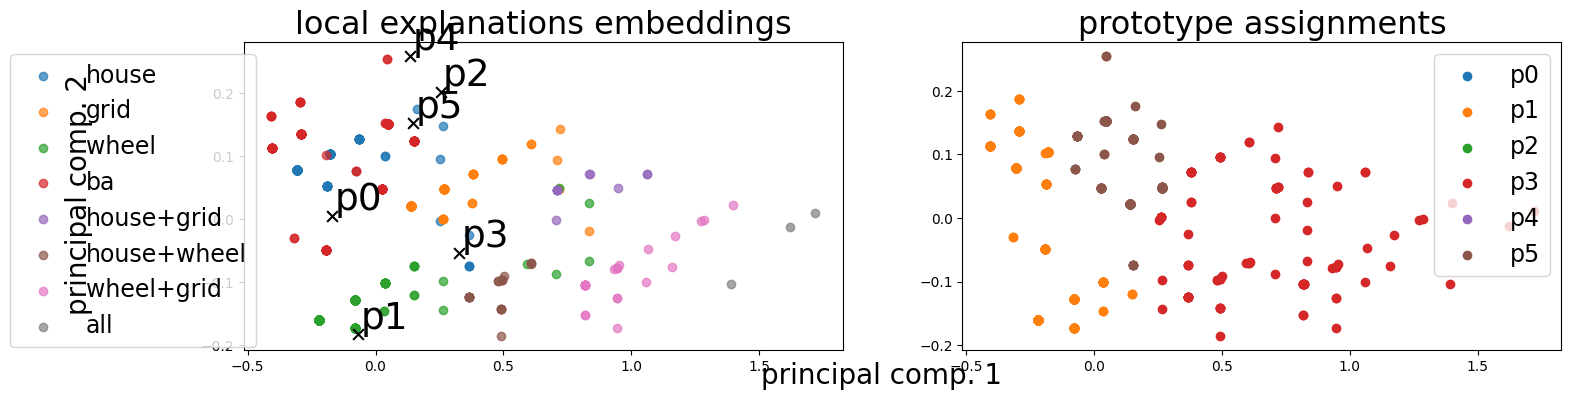

Alpha norms:
tensor([[0.2117, 0.2447, 0.7900, 0.4887, 1.0000, 0.2702],
        [0.1421, 0.0730, 0.8236, 0.4924, 1.0000, 0.2045]])
Concept Purity: 0.422169 +- 0.113966
Concept distribution:  (array([1, 3, 5]), array([483,  99, 280]))
Logic formulas:
For class 0:
0.9285714285714286 (feature0000000001)
For class 1:
0.9285714285714286 (feature0000000005) | (feature0000000003) | ((feature0000000001 & feature0000000005) | ((feature0000000001 & feature0000000003) | (feature0000000005 & feature0000000003)
Accuracy as classifier:  0.9286
LEN fidelity:  tensor(0.9286)


180 | Train Acc: 0.87, Train Loss: 0.03853, Train LEN loss: 0.037249, | Val Acc: 0.54, Val Loss: 0.13215, Val LEN loss: 0.109
181 | Train Acc: 0.87, Train Loss: 0.04352, Train LEN loss: 0.041586, | Val Acc: 0.54, Val Loss: 0.12844, Val LEN loss: 0.110
182 | Train Acc: 0.88, Train Loss: 0.03826, Train LEN loss: 0.036579, | Val Acc: 0.49, Val Loss: 0.13349, Val LEN loss: 0.117
183 | Train Acc: 0.87, Train Loss: 0.03768, Train LEN l

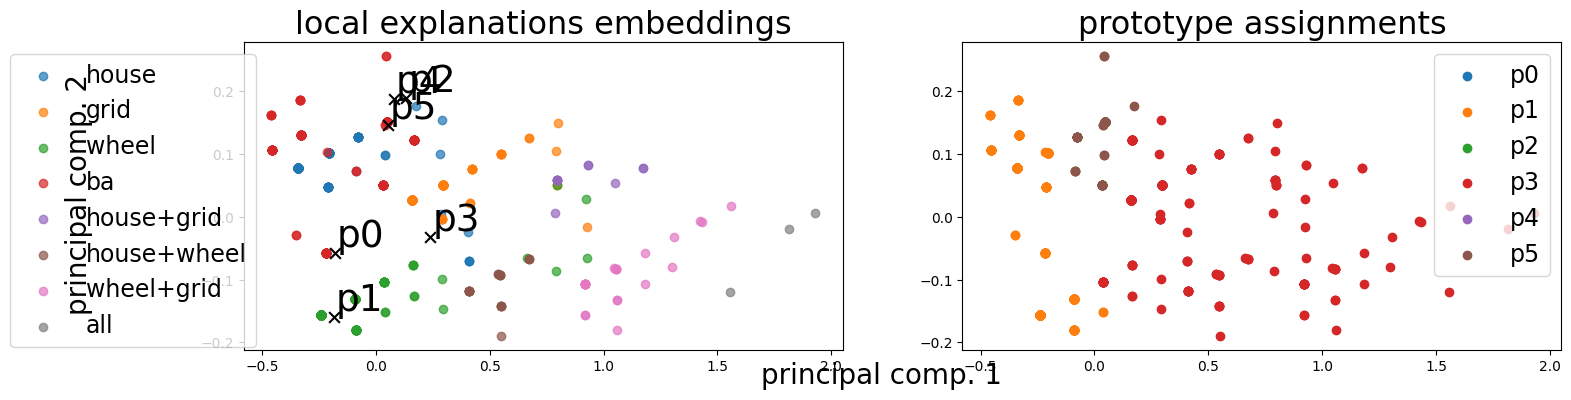

Alpha norms:
tensor([[0.2432, 0.3099, 0.8853, 0.5770, 1.0000, 0.4027],
        [0.1720, 0.1020, 0.8478, 0.6218, 1.0000, 0.3808]])
Concept Purity: 0.642316 +- 0.145138
Concept distribution:  (array([1, 3, 5]), array([468, 279, 115]))
Logic formulas:
For class 0:
0.9135338345864662 (feature0000000001)
For class 1:
0.9135338345864662 (feature0000000005) | (feature0000000003) | (feature0000000005 & feature0000000003) | ((feature0000000001 & feature0000000003) | ((feature0000000001 & feature0000000005) | ((feature0000000001 & feature0000000005 & feature0000000003)
Accuracy as classifier:  0.9135
LEN fidelity:  tensor(0.9135)


200 | Train Acc: 0.89, Train Loss: 0.03394, Train LEN loss: 0.032687, | Val Acc: 0.53, Val Loss: 0.14300, Val LEN loss: 0.129
201 | Train Acc: 0.90, Train Loss: 0.02945, Train LEN loss: 0.028078, | Val Acc: 0.53, Val Loss: 0.14462, Val LEN loss: 0.130
202 | Train Acc: 0.88, Train Loss: 0.03591, Train LEN loss: 0.034462, | Val Acc: 0.54, Val Loss: 0.14269, Val LEN loss

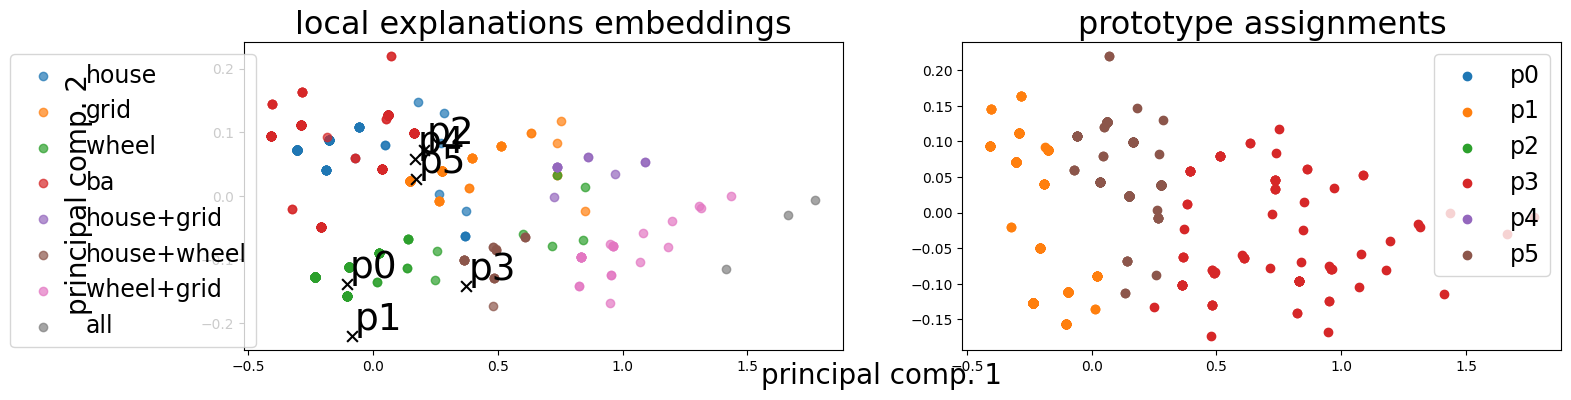

Alpha norms:
tensor([[0.2704, 0.3672, 0.8975, 0.6831, 1.0000, 0.5246],
        [0.2021, 0.1346, 0.8107, 0.7575, 1.0000, 0.5971]])
Concept Purity: 0.428929 +- 0.104464
Concept distribution:  (array([1, 3, 5]), array([481,  92, 289]))
Logic formulas:
For class 0:
0.9285714285714286 (feature0000000001)
For class 1:
0.9285714285714286 (feature0000000005) | (feature0000000003) | (feature0000000005 & feature0000000003) | ((feature0000000001 & feature0000000005) | ((feature0000000001 & feature0000000003)
Accuracy as classifier:  0.9286
LEN fidelity:  tensor(0.9286)


220 | Train Acc: 0.91, Train Loss: 0.03498, Train LEN loss: 0.034220, | Val Acc: 0.54, Val Loss: 0.15653, Val LEN loss: 0.142
221 | Train Acc: 0.91, Train Loss: 0.02950, Train LEN loss: 0.028480, | Val Acc: 0.54, Val Loss: 0.15926, Val LEN loss: 0.143
222 | Train Acc: 0.92, Train Loss: 0.02507, Train LEN loss: 0.023928, | Val Acc: 0.51, Val Loss: 0.16748, Val LEN loss: 0.153
223 | Train Acc: 0.88, Train Loss: 0.03530, Train LEN l

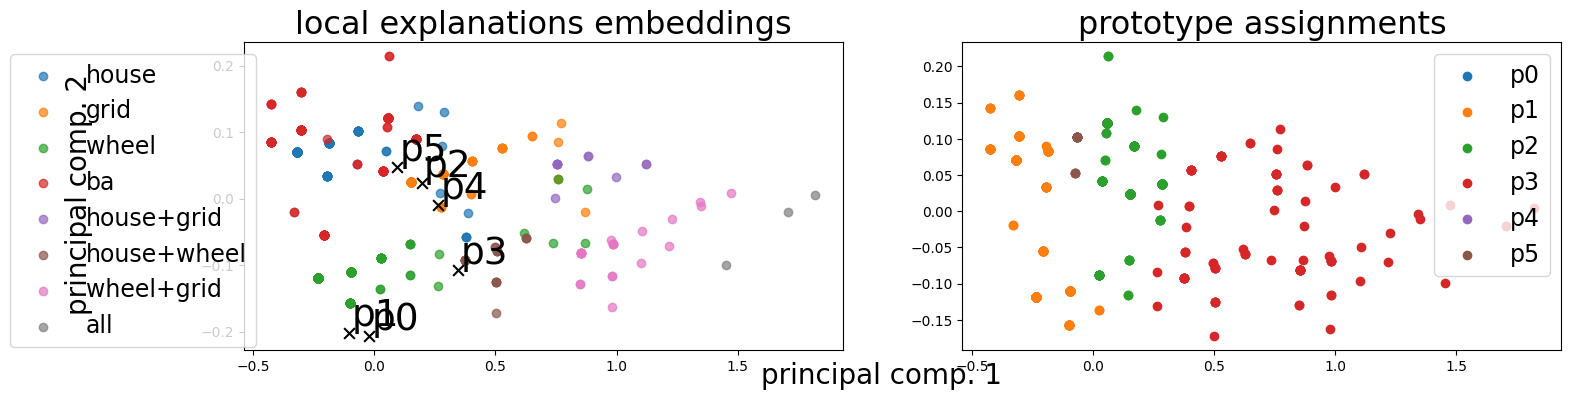

Alpha norms:
tensor([[0.3011, 0.4129, 0.9156, 0.7490, 1.0000, 0.6020],
        [0.2789, 0.2001, 0.9554, 0.9865, 1.0000, 0.8913]])
Concept Purity: 0.529241 +- 0.204023
Concept distribution:  (array([1, 2, 3, 5]), array([468, 287,  94,  13]))
Logic formulas:
For class 0:
0.9135338345864662 (feature0000000001)
For class 1:
0.9154135338345865 (feature0000000002) | (feature0000000003) | (feature0000000005 & feature0000000002) | (feature0000000002 & feature0000000003) | ((feature0000000001 & feature0000000002) | ((feature0000000001 & feature0000000005) | ((feature0000000001 & feature0000000003) | ((feature0000000001 & feature0000000005 & feature0000000002)
Accuracy as classifier:  0.9135
LEN fidelity:  tensor(0.9135)


240 | Train Acc: 0.89, Train Loss: 0.03085, Train LEN loss: 0.029907, | Val Acc: 0.53, Val Loss: 0.16083, Val LEN loss: 0.153
241 | Train Acc: 0.90, Train Loss: 0.02632, Train LEN loss: 0.025578, | Val Acc: 0.53, Val Loss: 0.16059, Val LEN loss: 0.153
242 | Train Acc: 0.90, Tr

In [7]:
train_group_loader = utils.build_dataloader(dataset_train, belonging_train, num_input_graphs=128)
val_group_loader   = utils.build_dataloader(dataset_val,   belonging_val, num_input_graphs=256)
test_group_loader  = utils.build_dataloader(dataset_test,  belonging_test, num_input_graphs=256)


torch.manual_seed(42)
len_model    = models.LEN(hyper_params["num_prototypes"], 
                          hyper_params["LEN_temperature"], 
                          remove_attention=hyper_params["remove_attention"]).to(device)
le_model     = models.LEEmbedder(num_features=hyper_params["num_le_features"], 
                                 activation=hyper_params["activation"], 
                                 num_hidden=hyper_params["dim_prototypes"]).to(device)
expl         = models.GLGExplainer(len_model, 
                                   le_model, 
                                   device=device, 
                                   hyper_params=hyper_params,
                                   classes_names=bamultishapes_classes_names,
                                   dataset_name=DATASET_NAME,
                                   num_classes=len(train_group_loader.dataset.data.task_y.unique())
                                  ).to(device)

expl.iterate(train_group_loader, val_group_loader, plot=True)

(array([0., 1., 2., 3., 4., 5., 6., 7.], dtype=float32), array([38, 38, 59, 65,  4,  6,  4,  1]))
[0.9240877  0.07228761]


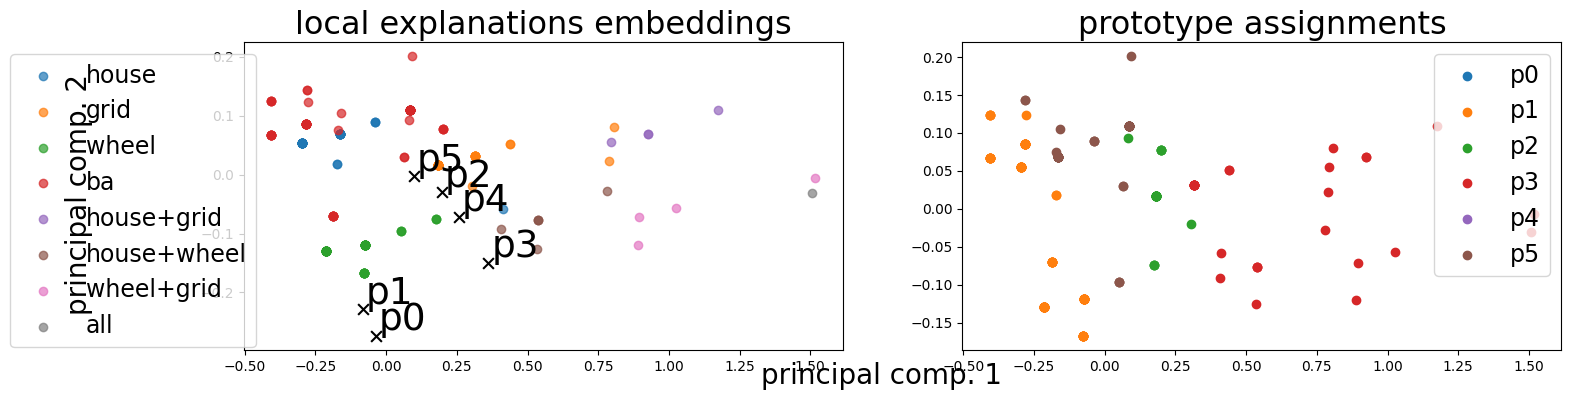

Alpha norms:
tensor([[0.2931, 0.4051, 0.8076, 0.7329, 1.0000, 0.5900],
        [0.2944, 0.2078, 0.8966, 1.0000, 0.9712, 0.9088]])
Concept Purity: 0.563037 +- 0.118636
Concept distribution:  (array([1, 2, 3, 5]), array([108,  33,  29,  45]))
Logic formulas:
For class 0:
0.4925373134328358 (feature0000000001)
For class 1:
0.5074626865671642 (feature0000000005) | (feature0000000003) | (feature0000000002 & feature0000000005) | (feature0000000005 & feature0000000003) | ((feature0000000001 & feature0000000003) | ((feature0000000001 & feature0000000002) | ((feature0000000001 & feature0000000005) | (feature0000000002)
Accuracy as classifier:  0.4925
LEN fidelity:  tensor(0.4925)



In [8]:
expl.inspect(test_group_loader)

(array([0., 1., 2., 3., 4., 5., 6., 7.], dtype=float32), array([167, 161, 263, 210,  11,  21,  26,   3]))
[0.929525   0.06673706]


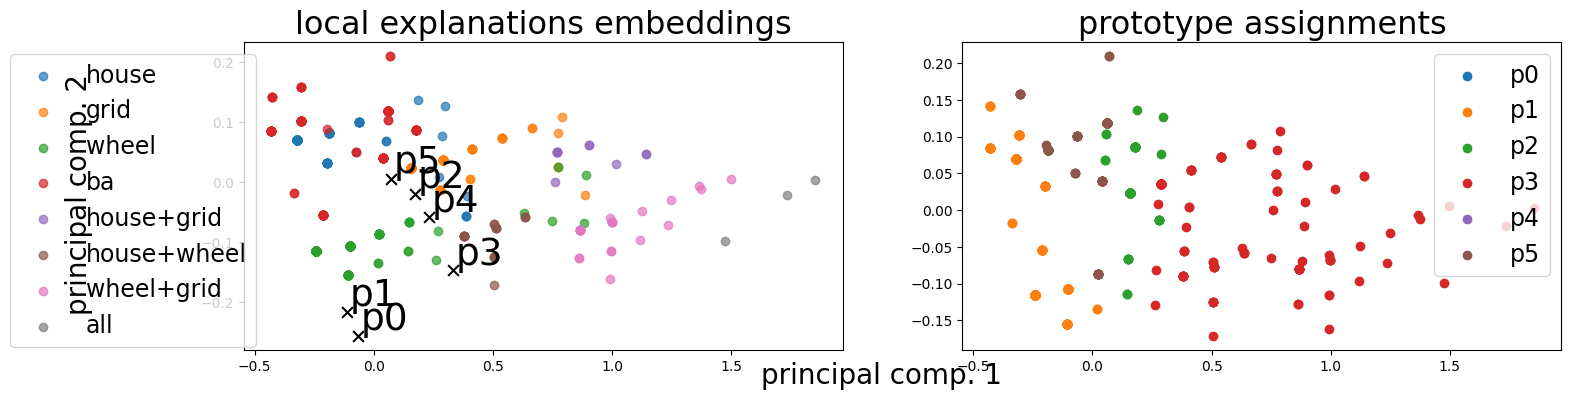

Alpha norms:
tensor([[0.2931, 0.4051, 0.8076, 0.7329, 1.0000, 0.5900],
        [0.2944, 0.2078, 0.8966, 1.0000, 0.9712, 0.9088]])
Concept Purity: 0.590536 +- 0.076047
Concept distribution:  (array([1, 2, 3, 5]), array([422, 126, 145, 169]))
Logic formulas:
For class 0:
0.868421052631579 (feature0000000001)
For class 1:
0.868421052631579 (feature0000000005) | (feature0000000003) | (feature0000000002) | (feature0000000002 & feature0000000005) | (feature0000000002 & feature0000000003) | (feature0000000005 & feature0000000003) | ((feature0000000001 & feature0000000003) | ((feature0000000001 & feature0000000002) | ((feature0000000001 & feature0000000005) | ((feature0000000001 & feature0000000005 & feature0000000003) | ((feature0000000001 & feature0000000002 & feature0000000005)
Accuracy as classifier:  0.8684
LEN fidelity:  tensor(0.8684)



In [12]:
expl.inspect(train_group_loader)

## Load Trained Model

/DATATWO/users/burouj/miniconda3/envs/glg/lib/python3.10/site-packages/torch_geometric/data/in_memory_dataset.py:301: UserWarning: It is not recommended to directly access the internal storage format `data` of an 'InMemoryDataset'. The data of the dataset is already cached, so any modifications to `data` will not be reflected when accessing its elements. Clearing the cache now by removing all elements in `dataset._data_list`. If you are absolutely certain what you are doing, access the internal storage via `InMemoryDataset._data` instead to suppress this warning. Alternatively, you can access stacked individual attributes of every graph via `dataset.{attr_name}`.
  warnings.warn(msg)


(array([0., 1., 2., 3., 4., 5., 6., 7.], dtype=float32), array([167, 161, 263, 210,  11,  21,  26,   3]))
[0.7872611  0.20834668]


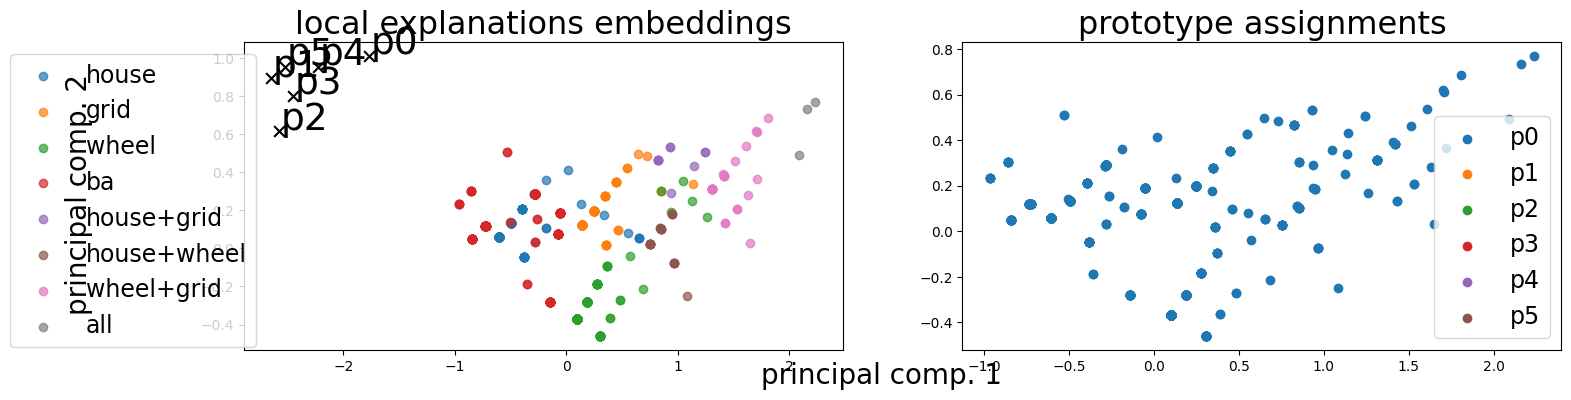

Alpha norms:
tensor([[0.4375, 0.3889, 1.0000, 0.3983, 0.2960, 0.4619],
        [0.0924, 0.1938, 1.0000, 0.1937, 0.1743, 0.1225]])
Concept Purity: 0.305104 +- 0.000000
Concept distribution:  (array([0]), array([862]))
Logic formulas:
For class 0:
0.0 ()
For class 1:
0.0 ()
Accuracy as classifier:  0.0
LEN fidelity:  tensor(0.3853)



In [11]:
train_group_loader = utils.build_dataloader(dataset_train, belonging_train, num_input_graphs=128)
val_group_loader  = utils.build_dataloader(dataset_val, belonging_val, num_input_graphs=256)
test_group_loader = utils.build_dataloader(dataset_test, belonging_test, num_input_graphs=256)

len_model2    = models.LEN(hyper_params["num_prototypes"], 
                           hyper_params["LEN_temperature"], 
                           remove_attention=hyper_params["remove_attention"]).to(device)
le_model2     = models.LEEmbedder(num_features=hyper_params["num_le_features"], 
                                  activation=hyper_params["activation"], 
                                  num_hidden=hyper_params["dim_prototypes"]).to(device)
best_expl     = models.GLGExplainer(len_model2, 
                                    le_model2,                                        
                                    device, 
                                    hyper_params=hyper_params,
                                    classes_names=bamultishapes_classes_names,
                                    dataset_name=DATASET_NAME,
                                    num_classes=len(train_group_loader.dataset.data.task_y.unique())
                                  ).to(device)
best_expl.load_state_dict(torch.load("../trained_models/BAMultiShapes.pt"))
best_expl.eval()

best_expl.inspect(train_group_loader)

### materialize prototypes

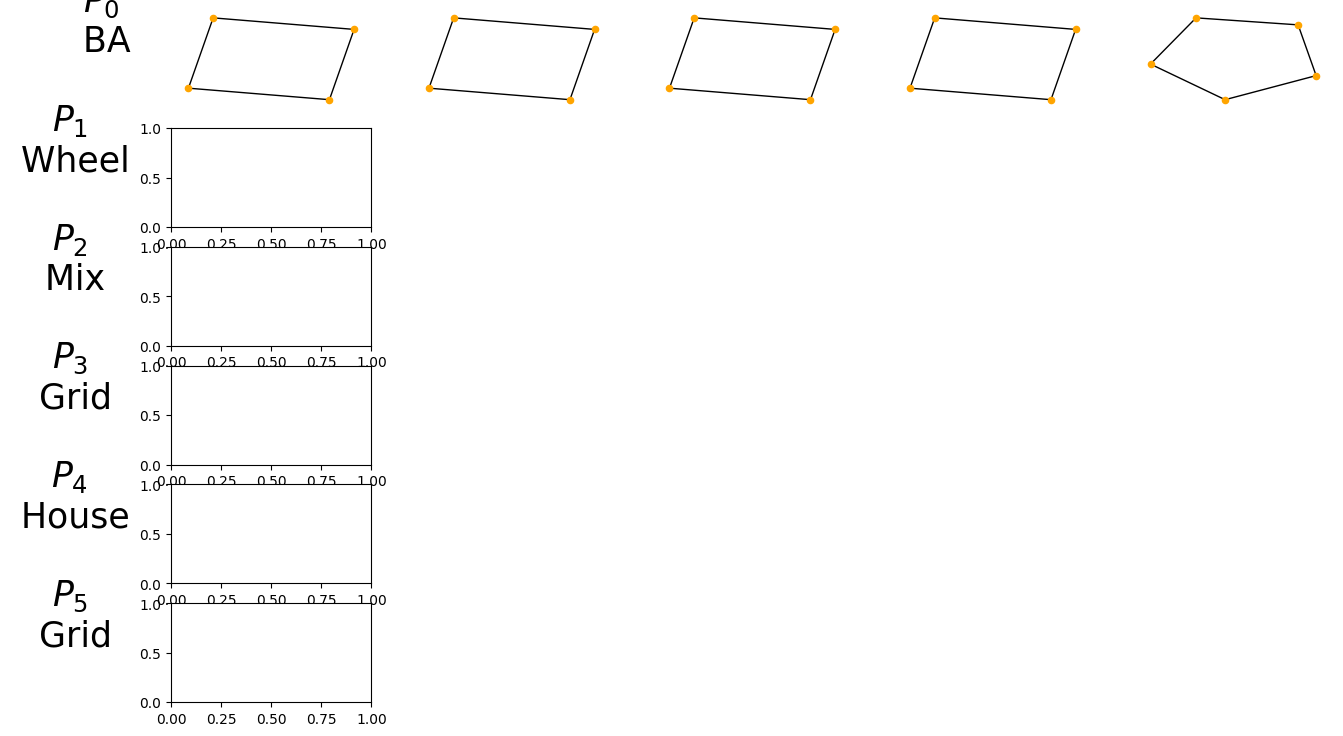

In [13]:
# change assign function to a non-discrete one just to compute distance between local expls. and prototypes
# useful to show the materialization of prototypes based on distance 
best_expl.hyper["assign_func"] = "sim"


x_train , emb , concepts_assignement , y_train_1h , le_classes , le_idxs , belonging = best_expl.get_concept_vector(test_group_loader, 
                                                                                                                    return_raw=True)        
best_expl.hyper["assign_func"] = "discrete"

proto_names = {
    0: "BA",
    1: "Wheel",
    2: "Mix",
    3: "Grid",
    4: "House",
    5: "Grid",
}
torch.manual_seed(42)
fig = plt.figure(figsize=(15,5*1.8))
n = 0
for p in range(best_expl.hyper["num_prototypes"]):
    idxs = le_idxs[concepts_assignement.argmax(-1) == p]
    #idxs = idxs[torch.randperm(len(idxs))]    # random 
    sa = concepts_assignement[concepts_assignement.argmax(-1) == p]
    idxs = idxs[torch.argsort(sa[:, p], descending=True)]
    for ex in range(min(5, len(idxs))):
        n += 1
        ax = plt.subplot(best_expl.hyper["num_prototypes"],5,n)      
        G = to_networkx(dataset_test[int(idxs[ex])], to_undirected=True)
        pos = nx.spring_layout(G, seed=42)
        nx.draw(G, pos, node_size=20, ax=ax, node_color="orange")
        ax.axis("on")
        plt.box(False)
        
for p in range(best_expl.hyper["num_prototypes"]):
    plt.subplot(best_expl.hyper["num_prototypes"],5,5*p + 1)
    plt.ylabel(f"$P_{p}$\n {proto_names[p]}", size=25, rotation="horizontal", labelpad=50)

plt.show() 